In [2]:
import matplotlib.pyplot as plt


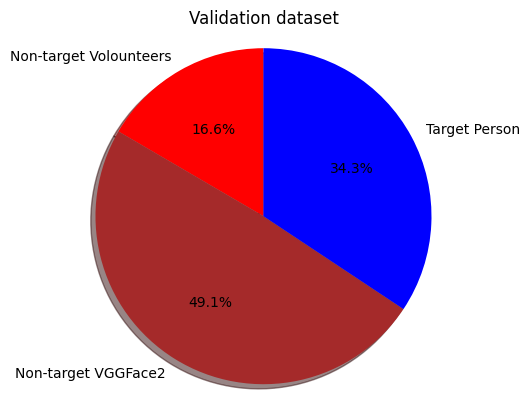

In [ ]:
labels = ['Non-target Volounteers', 'Non-target VGGFace2', 'Target Person']
sizes = [201, 595, 416] 
colors = ['red', 'brown', 'blue']  
explode = (0, 0.0, 0) 

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Validation dataset")
plt.axis('equal')

plt.show()


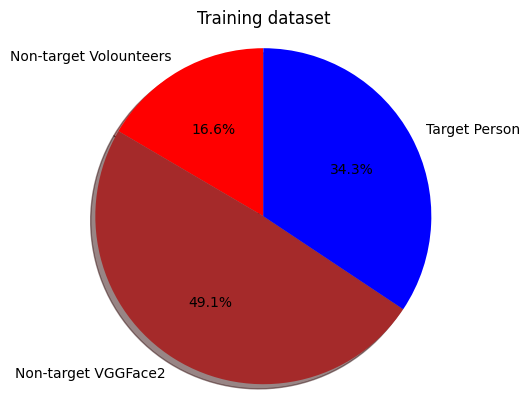

In [ ]:


labels = ['Non-target Volounteers', 'Non-target VGGFace2', 'Target Person']
sizes = [804, 2385, 1668] 
colors = ['red', 'brown', 'blue']  
explode = (0, 0.0, 0) 

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Training dataset")
plt.axis('equal')

plt.show()


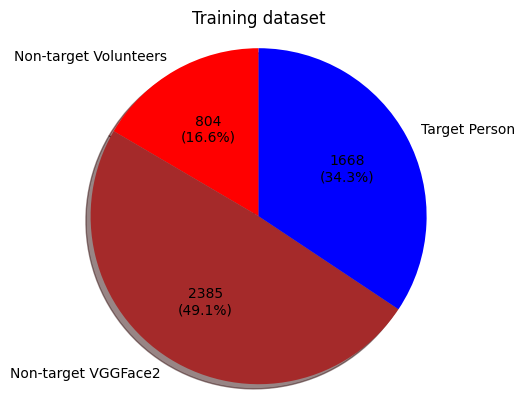

In [ ]:
import matplotlib.pyplot as plt

labels = ['Non-target Volunteers', 'Non-target VGGFace2', 'Target Person']
sizes = [804, 2385, 1668] 
colors = ['red', 'brown', 'blue'] 
explode = (0, 0.0, 0) 

def autopct_format(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f"{absolute}\n({pct:.1f}%)"

plt.pie(sizes, labels=labels, colors=colors, explode=explode, 
        autopct=lambda pct: autopct_format(pct, sizes), shadow=True, startangle=90)

plt.title("Training dataset")
plt.axis('equal')

plt.show()


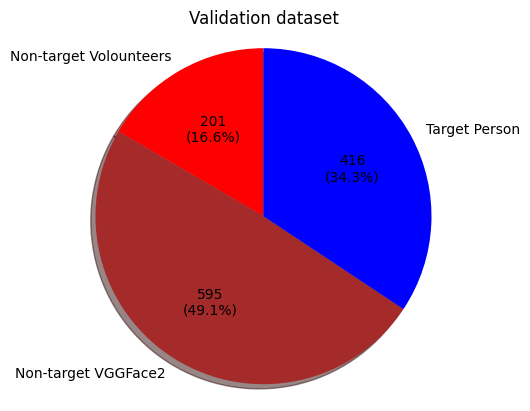

In [ ]:

labels = ['Non-target Volounteers', 'Non-target VGGFace2', 'Target Person']
sizes = [201, 595, 416] 
colors = ['red', 'brown', 'blue'] 
explode = (0, 0.0, 0) 

def autopct_format(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f"{absolute}\n({pct:.1f}%)"

plt.pie(sizes, labels=labels, colors=colors, explode=explode, 
        autopct=lambda pct: autopct_format(pct, sizes), shadow=True, startangle=90)
plt.title("Validation dataset")
plt.axis('equal')

plt.show()


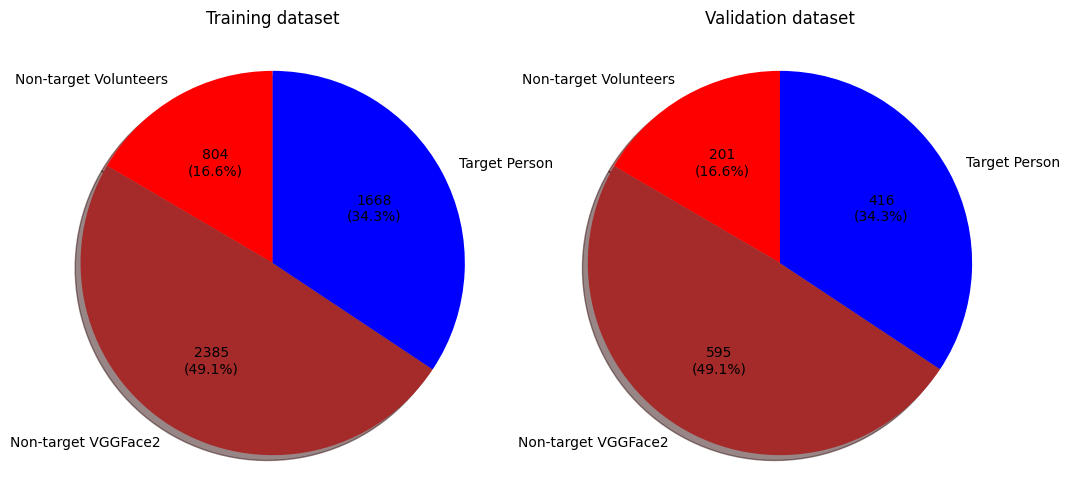

In [ ]:
import matplotlib.pyplot as plt

labels_train = ['Non-target Volunteers', 'Non-target VGGFace2', 'Target Person']
sizes_train = [804, 2385, 1668]
colors = ['red', 'brown', 'blue']
explode = (0, 0.0, 0)

labels_val = ['Non-target Volunteers', 'Non-target VGGFace2', 'Target Person']
sizes_val = [201, 595, 416]

def autopct_format(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f"{absolute}\n({pct:.1f}%)"

fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 

axes[0].pie(sizes_train, labels=labels_train, colors=colors, explode=explode,
            autopct=lambda pct: autopct_format(pct, sizes_train),
            shadow=True, startangle=90)
axes[0].set_title("Training dataset")
axes[0].axis('equal')

axes[1].pie(sizes_val, labels=labels_val, colors=colors, explode=explode,
            autopct=lambda pct: autopct_format(pct, sizes_val),
            shadow=True, startangle=90)
axes[1].set_title("Validation dataset")
axes[1].axis('equal')
plt.savefig("train_val_stats1.png")
plt.show()


In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
image_dir = r"data\train\non_target_person"

heights = []
widths = []
ratios = []

for filename in os.listdir(image_dir):
    if filename.startswith("cropped"):
        filepath = os.path.join(image_dir, filename)
        with Image.open(filepath) as img:
            w, h = img.size
            widths.append(w)
            heights.append(h)
            ratios.append(h / w)  

mean_ratio = np.mean(ratios)



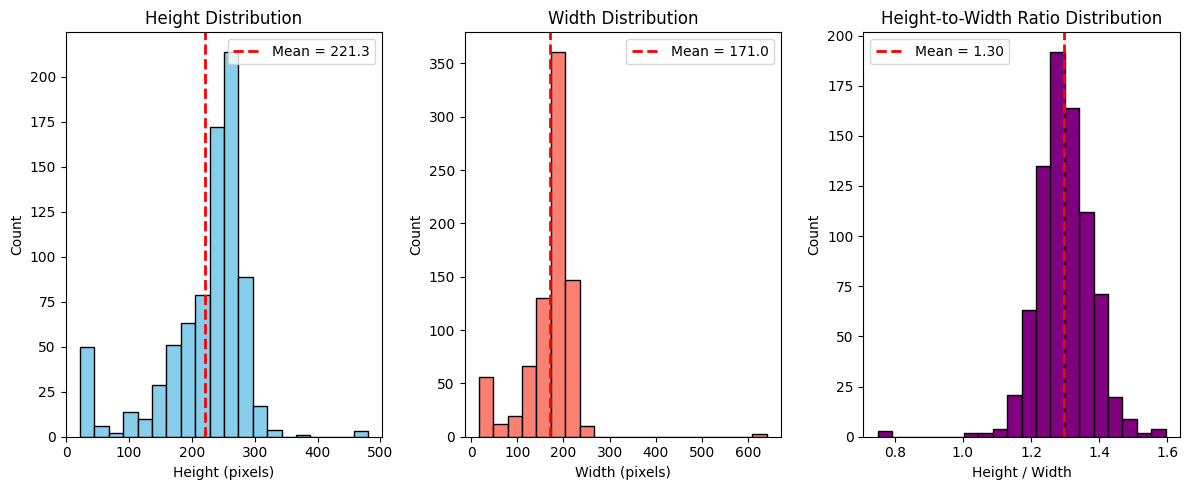

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

mean_height = np.mean(heights)
mean_width = np.mean(widths)

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.hist(heights, bins=20, color='skyblue', edgecolor='black')
plt.axvline(mean_height, color='red', linestyle='dashed', linewidth=2, label=f"Mean = {mean_height:.1f}")
plt.title("Height Distribution")
plt.xlabel("Height (pixels)")
plt.ylabel("Count")
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(widths, bins=20, color='salmon', edgecolor='black')
plt.axvline(mean_width, color='red', linestyle='dashed', linewidth=2, label=f"Mean = {mean_width:.1f}")
plt.title("Width Distribution")
plt.xlabel("Width (pixels)")
plt.ylabel("Count")
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(ratios, bins=20, color='purple', edgecolor='black')
plt.axvline(mean_ratio, color='red', linestyle='dashed', linewidth=2, label=f"Mean = {mean_ratio:.2f}")
plt.title("Height-to-Width Ratio Distribution")
plt.xlabel("Height / Width")
plt.ylabel("Count")
plt.legend()

plt.tight_layout()
plt.savefig("train_height_width_distributions_nontarget.png")
plt.show()


In [ ]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image_dir = r"data\train\non_target_person"

luminances = []

for filename in os.listdir(image_dir):
    if filename.startswith("cropped") and filename.lower().endswith((".jpg", ".png")):
        filepath = os.path.join(image_dir, filename)
        with Image.open(filepath).convert("RGB") as img:
            arr = np.array(img)
            brightness = 0.299 * arr[:,:,0] + 0.587 * arr[:,:,1] + 0.114 * arr[:,:,2]
            luminances.append(brightness.mean())

mean_luminance = np.mean(luminances)




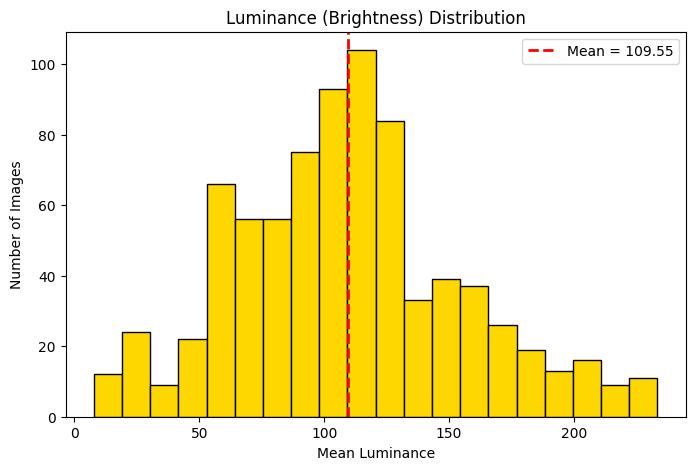

In [51]:
plt.figure(figsize=(8, 5))
plt.hist(luminances, bins=20, color='gold', edgecolor='black')
plt.axvline(mean_luminance, color='red', linestyle='dashed', linewidth=2, label=f"Mean = {mean_luminance:.2f}")
plt.title("Luminance (Brightness) Distribution")
plt.xlabel("Mean Luminance")
plt.ylabel("Number of Images")
plt.legend()
plt.savefig("luminance_nontarget.png")
plt.show()

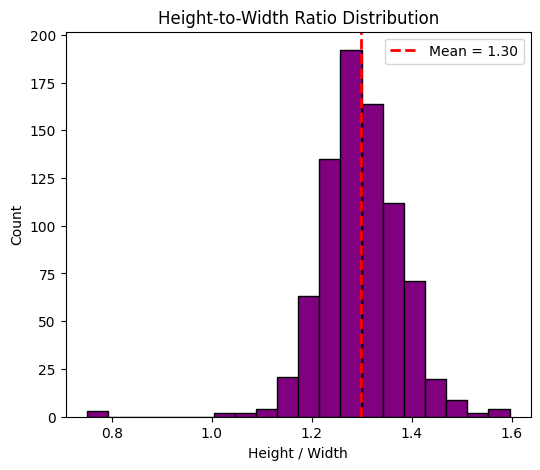

In [28]:
plt.figure(figsize=(6, 5))
plt.hist(ratios, bins=20, color='purple', edgecolor='black')
plt.axvline(mean_ratio, color='red', linestyle='dashed', linewidth=2, label=f"Mean = {mean_ratio:.2f}")
plt.title("Height-to-Width Ratio Distribution")
plt.xlabel("Height / Width")
plt.ylabel("Count")
plt.legend()
plt.savefig("train_height_width_ratio_nontarget.png")
plt.show()

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

image_dir = r"C:\Users\vxthe\Desktop\thesis\faces\data\train\target_person"


heightst = []
widthst = []
ratiost = []

for filename in os.listdir(image_dir):
    if filename.startswith("cropped"):
        filepath = os.path.join(image_dir, filename)
        with Image.open(filepath) as img:
            w, h = img.size
            widthst.append(w)
            heightst.append(h)
            ratiost.append(h / w) 

mean_ratiot = np.mean(ratiost)
mean_heightt = np.mean(heightst)
mean_widtht = np.mean(widthst)


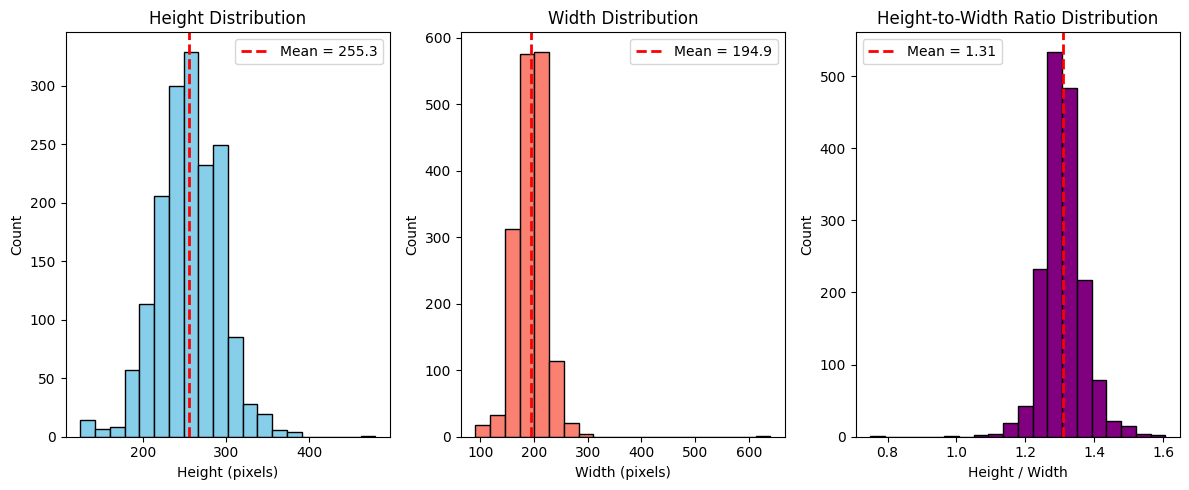

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


mean_height = np.mean(heightst)
mean_width = np.mean(widthst)


plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.hist(heightst, bins=20, color='skyblue', edgecolor='black')
plt.axvline(mean_heightt, color='red', linestyle='dashed', linewidth=2, label=f"Mean = {mean_height:.1f}")
plt.title("Height Distribution")
plt.xlabel("Height (pixels)")
plt.ylabel("Count")
plt.legend()


plt.subplot(1, 3, 2)
plt.hist(widthst, bins=20, color='salmon', edgecolor='black')
plt.axvline(mean_widtht, color='red', linestyle='dashed', linewidth=2, label=f"Mean = {mean_width:.1f}")
plt.title("Width Distribution")
plt.xlabel("Width (pixels)")
plt.ylabel("Count")
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(ratiost, bins=20, color='purple', edgecolor='black')
plt.axvline(mean_ratiot, color='red', linestyle='dashed', linewidth=2, label=f"Mean = {mean_ratio:.2f}")
plt.title("Height-to-Width Ratio Distribution")
plt.xlabel("Height / Width")
plt.ylabel("Count")
plt.legend()

plt.tight_layout()
plt.savefig("train_height_width_distributions_target.png")
plt.show()


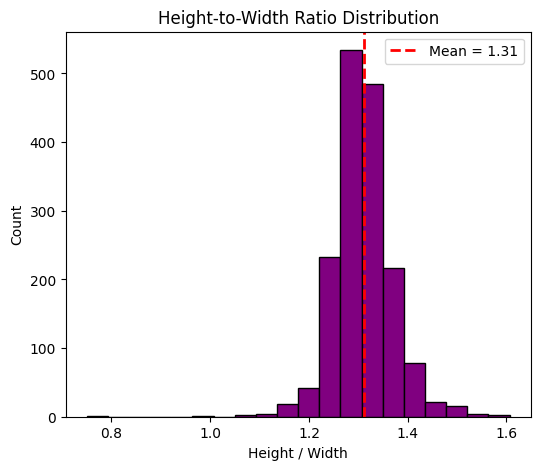

In [31]:
plt.figure(figsize=(6, 5))
plt.hist(ratios, bins=20, color='purple', edgecolor='black')
plt.axvline(mean_ratio, color='red', linestyle='dashed', linewidth=2, label=f"Mean = {mean_ratio:.2f}")
plt.title("Height-to-Width Ratio Distribution")
plt.xlabel("Height / Width")
plt.ylabel("Count")
plt.legend()
plt.savefig("train_height_width_ratios_nontarget.png")
plt.show()

In [20]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image_dir = r"C:\Users\vxthe\Desktop\thesis\faces\data\test\target_person"
luminancest = []
for filename in os.listdir(image_dir):
    if filename.startswith("cropped") and filename.lower().endswith((".jpg", ".png")):
        filepath = os.path.join(image_dir, filename)
        with Image.open(filepath).convert("RGB") as img:
            arr = np.array(img)
            brightness = 0.299 * arr[:,:,0] + 0.587 * arr[:,:,1] + 0.114 * arr[:,:,2]
            luminancest.append(brightness.mean())

mean_luminancet = np.mean(luminancest)

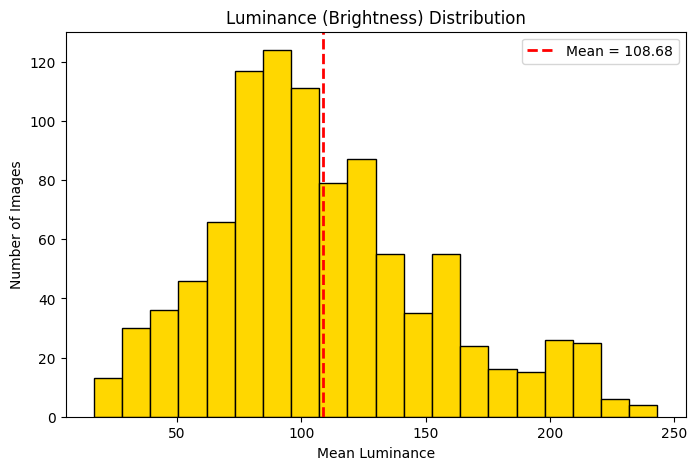

In [26]:
plt.figure(figsize=(8, 5))
plt.hist(luminancest, bins=20, color='gold', edgecolor='black')
plt.axvline(mean_luminancet, color='red', linestyle='dashed', linewidth=2, label=f"Mean = {mean_luminancet:.2f}")
plt.title("Luminance (Brightness) Distribution")
plt.xlabel("Mean Luminance")
plt.ylabel("Number of Images")
# plt.xlim(10,250)
plt.legend()
plt.savefig("luminance_target_test.png")
plt.show()

In [22]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image_dir = r"C:\Users\vxthe\Desktop\thesis\faces\data\test\non_target_person"
luminancestt = []
for filename in os.listdir(image_dir):
    if filename.startswith("cropped") and filename.lower().endswith((".jpg", ".png")):
        filepath = os.path.join(image_dir, filename)
        with Image.open(filepath).convert("RGB") as img:
            arr = np.array(img)
            brightness = 0.299 * arr[:,:,0] + 0.587 * arr[:,:,1] + 0.114 * arr[:,:,2]
            luminancestt.append(brightness.mean())

mean_luminancett = np.mean(luminancestt)

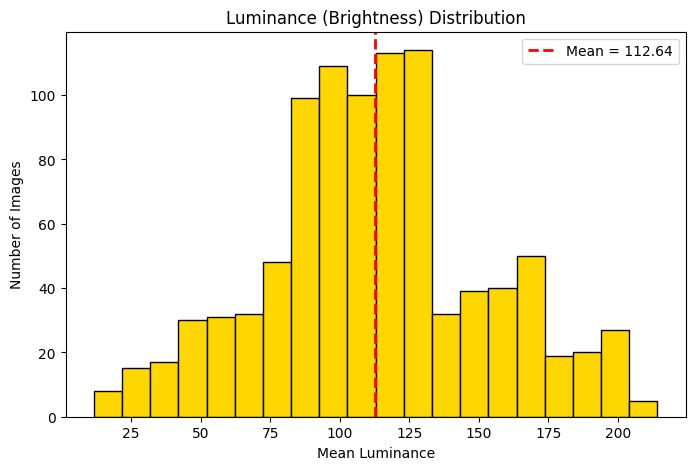

In [23]:
plt.figure(figsize=(8, 5))
plt.hist(luminancestt, bins=20, color='gold', edgecolor='black')
plt.axvline(mean_luminancett, color='red', linestyle='dashed', linewidth=2, label=f"Mean = {mean_luminancett:.2f}")
plt.title("Luminance (Brightness) Distribution")
plt.xlabel("Mean Luminance")
plt.ylabel("Number of Images")
plt.legend()
plt.savefig("luminance_non_target_test.png")
plt.show()

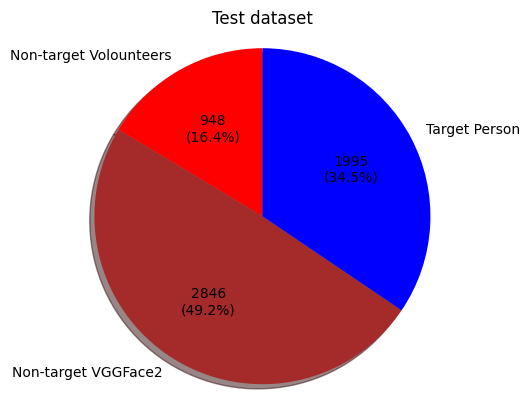

In [ ]:


labels = ['Non-target Volounteers', 'Non-target VGGFace2', 'Target Person']
sizes = [948, 2846, 1995] 
colors = ['red', 'brown', 'blue'] 
explode = (0, 0.0, 0) 


def autopct_format(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f"{absolute}\n({pct:.1f}%)"


plt.pie(sizes, labels=labels, colors=colors, explode=explode, 
        autopct=lambda pct: autopct_format(pct, sizes), shadow=True, startangle=90)
plt.title("Test dataset")

plt.axis('equal')
plt.savefig("test_stats1.png")

plt.show()


In [28]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

IMG_HEIGHT, IMG_WIDTH = 170, 220
BATCH_SIZE = 32

train_tfms = transforms.Compose([
    transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),
    # transforms.RandomHorizontalFlip(p=0.5),   
    transforms.RandomVerticalFlip(p=0.5),     
    transforms.RandomApply([
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1)
    ], p=0.5),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

val_tfms = transforms.Compose([
    transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

mapping =  {"target_person": 1, "non_target_person": 0}
train_dataset = datasets.ImageFolder("data/train", transform=train_tfms)
train_dataset.class_to_idx = mapping

val_dataset   = datasets.ImageFolder("data/val", transform=val_tfms)
val_dataset.class_to_idx = mapping

test_dataset = datasets.ImageFolder("data/test", transform=val_tfms)
val_dataset.class_to_idx = mapping

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)


In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets

mapping = {"target_person": 1, "non_target_person": 0}
test_dataset = datasets.ImageFolder("data/test", transform=val_tfms)
test_dataset.class_to_idx = mapping

target_indices = [i for i, (_, label) in enumerate(test_dataset) if label == 1]
nontarget_indices = [i for i, (_, label) in enumerate(test_dataset) if label == 0]




In [45]:
target_indices

[3794,
 3795,
 3796,
 3797,
 3798,
 3799,
 3800,
 3801,
 3802,
 3803,
 3804,
 3805,
 3806,
 3807,
 3808,
 3809,
 3810,
 3811,
 3812,
 3813,
 3814,
 3815,
 3816,
 3817,
 3818,
 3819,
 3820,
 3821,
 3822,
 3823,
 3824,
 3825,
 3826,
 3827,
 3828,
 3829,
 3830,
 3831,
 3832,
 3833,
 3834,
 3835,
 3836,
 3837,
 3838,
 3839,
 3840,
 3841,
 3842,
 3843,
 3844,
 3845,
 3846,
 3847,
 3848,
 3849,
 3850,
 3851,
 3852,
 3853,
 3854,
 3855,
 3856,
 3857,
 3858,
 3859,
 3860,
 3861,
 3862,
 3863,
 3864,
 3865,
 3866,
 3867,
 3868,
 3869,
 3870,
 3871,
 3872,
 3873,
 3874,
 3875,
 3876,
 3877,
 3878,
 3879,
 3880,
 3881,
 3882,
 3883,
 3884,
 3885,
 3886,
 3887,
 3888,
 3889,
 3890,
 3891,
 3892,
 3893,
 3894,
 3895,
 3896,
 3897,
 3898,
 3899,
 3900,
 3901,
 3902,
 3903,
 3904,
 3905,
 3906,
 3907,
 3908,
 3909,
 3910,
 3911,
 3912,
 3913,
 3914,
 3915,
 3916,
 3917,
 3918,
 3919,
 3920,
 3921,
 3922,
 3923,
 3924,
 3925,
 3926,
 3927,
 3928,
 3929,
 3930,
 3931,
 3932,
 3933,
 3934,
 3935,
 3936,

In [43]:
sampled_nontarget = random.sample(nontarget_indices, 2)
sampled_nontarget

[339, 239]

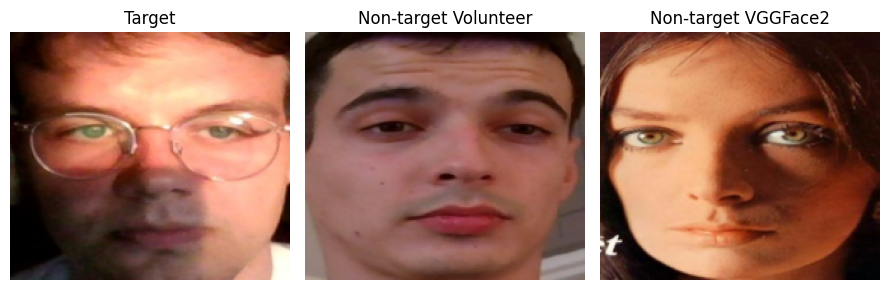

In [ ]:

sampled_target = [4758]

sampled_nontarget =[1042, 3000]

samples = [test_dataset[i] for i in sampled_target + sampled_nontarget]


def denormalize(img_tensor):
    img = img_tensor.numpy().transpose((1, 2, 0))  # CHW -> HWC
    img = img * 0.5 + 0.5  
    img = np.clip(img, 0, 1)
    return img


plt.figure(figsize=(9, 3))  
for idx, (img, label) in enumerate(samples):
    plt.subplot(1, 3, idx + 1)
    plt.imshow(denormalize(img), aspect="auto")
    if idx ==0:
        plt.title("Target")
    elif idx ==1:
        plt.title("Non-target Volunteer")
    elif idx ==2:
        plt.title("Non-target VGGFace2")
    plt.axis("off")

plt.tight_layout()
plt.savefig("example_input.png")
plt.show()
